<a href="https://colab.research.google.com/github/GDdeCastro/Computational_Methods_in_Physics/blob/main/projeto_1_metodos_computacionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#First Case: M1 >> M2

In [ ]:
# defining the necessary variables of the problem

m1 = 100*10**-3 #kg
m2 = m1/100 #kg
l1 = 0.5 #m
l2 = 0.5 #m
g = 9.8 #m/s²

Tf = 500 #s # duration
dt = 0.001 #s step


In [ ]:
# defining the derivative functions

def theta1_dot(p1, p2, theta1, theta2):
  global m1
  global m2
  global l1
  global l2
  global g

  return p1/(m1*l1**2) - (p2/(m1*l1*l2))*np.cos(theta1-theta2)

def theta2_dot(p1, p2, theta1, theta2):
  global m1
  global m2
  global l1
  global l2
  global g

  return p2/(m2*l2**2) - (p1/(m1*l1*l2))*np.cos(theta1-theta2)

def p1_dot(p1, p2, theta1, theta2):
  global m1
  global m2
  global l1
  global l2
  global g

  return -g*m1*l1*np.sin(theta1) - ((p1*p2)/(m1*l1*l2))*np.sin(theta1-theta2)

def p2_dot(p1, p2, theta1, theta2):
  global m1
  global m2
  global l1
  global l2
  global g

  return -g*m2*l2*np.sin(theta2) + ((p1*p2)/(m1*l1*l2))*np.sin(theta1-theta2)


In [ ]:
# defining the energy calculation function

def Energy(p1, p2, theta1, theta2):
  global m1
  global m2
  global l1
  global l2
  global g

  K = 1/(2*m1) * (p1/l1)**2 + 1/(2*m2) * (p2/l2)**2 - 1/(m1*l1*l2) * p1**2 * p2**2 * np.cos(theta1-theta2)
  U = m1*g*l1*(1-np.cos(theta1)) + m2*g*l2*(1-np.cos(theta2))

  E = K + U

  return E

In [ ]:
# defining the iteration function

def iterate(p1, p2, theta1, theta2):
  global m1
  global m2
  global l1
  global l2
  global dt
  global g

  k1_theta1 = theta1_dot(p1, p2, theta1, theta2)*dt
  k1_theta2 = theta2_dot(p1, p2, theta1, theta2)*dt
  k1_p1 = p1_dot(p1, p2, theta1, theta2)*dt
  k1_p2 = p2_dot(p1, p2, theta1, theta2)*dt

  theta1_half = theta1 + k1_theta1/2
  theta2_half = theta2 + k1_theta2/2
  p1_half = p1 + k1_p1/2
  p2_half = p2 + k1_p2/2

  k2_theta1 = theta1_dot(p1_half, p2_half, theta1_half, theta2_half)*dt
  k2_theta2 = theta2_dot(p1_half, p2_half, theta1_half, theta2_half)*dt
  k2_p1 = p1_dot(p1_half, p2_half, theta1_half, theta2_half)*dt
  k2_p2 = p2_dot(p1_half, p2_half, theta1_half, theta2_half)*dt

  theta1_new = theta1 + k2_theta1
  if theta1_new >= np.pi:
    theta1_new -= 2*np.pi
  elif theta1_new <= -np.pi:
    theta1_new += 2*np.pi
  theta2_new = theta2 + k2_theta2
  if theta2_new >= np.pi:
    theta2_new -= 2*np.pi
  elif theta2_new <= -np.pi:
    theta2_new += 2*np.pi
  p1_new = p1 + k2_p1
  p2_new = p2 + k2_p2
  # print(p1_new, p2_new, theta1_new, theta2_new)
  return p1_new, p2_new, theta1_new, theta2_new


In [ ]:
# defining lists
T = np.arange(0,Tf+dt, dt)
Theta1 = np.zeros(np.size(T))
Theta2 = np.zeros(np.size(T))
P1 = np.zeros(np.size(T))
P2 = np.zeros(np.size(T))
E = np.zeros(np.size(T))


In [ ]:
# defining initial conditions
#theta1_0 = np.pi/2 + (2/100)*np.pi/2
#theta2_0 = np.pi/2 - (2/100)*np.pi/2

theta1_0 = np.pi/2
theta2_0 = np.pi/2

p2_0 = 0
p1_0 = 0
#E_0 = 0.1
#p1_0 = np.sqrt(2*m1*l1**2*(E_0-m2*g*l2)) # picked the positive root, but you can change it if necessary
E_0 = Energy(p1_0,p2_0, theta1_0, theta2_0)
Theta1[0] = theta1_0
Theta2[0] = theta2_0
P1[0] = p1_0
P2[0] = p2_0
E[0] = E_0

In [ ]:
# Running the simulation
for i in range(np.size(T)-1):
  aux = iterate(P1[i], P2[i], Theta1[i], Theta2[i])
  Theta1[i+1] = aux[2]
  Theta2[i+1] = aux[3]
  P1[i+1] = aux[0]
  P2[i+1] = aux[1]
  E[i+1] = Energy(P1[1+i], P2[i+1], Theta1[i+1], Theta2[i+1])

In [ ]:
for i in range(5):
  print(f'N = {i+1:.4f}: tempo={T[i]:.4f} theta1={Theta1[i]:.4f} Ptheta1={P1[i]:.4f} theta2={Theta2[i]:.4f} Ptheta2={P2[i]:.4f}')

N = 1.0000: tempo=0.0000 theta1=1.5708 Ptheta1=0.0000 theta2=1.5708 Ptheta2=0.0000
N = 2.0000: tempo=0.0010 theta1=1.5708 Ptheta1=-0.0005 theta2=1.5708 Ptheta2=-0.0000
N = 3.0000: tempo=0.0020 theta1=1.5708 Ptheta1=-0.0010 theta2=1.5708 Ptheta2=-0.0000
N = 4.0000: tempo=0.0030 theta1=1.5707 Ptheta1=-0.0015 theta2=1.5708 Ptheta2=-0.0000
N = 5.0000: tempo=0.0040 theta1=1.5706 Ptheta1=-0.0020 theta2=1.5708 Ptheta2=-0.0000


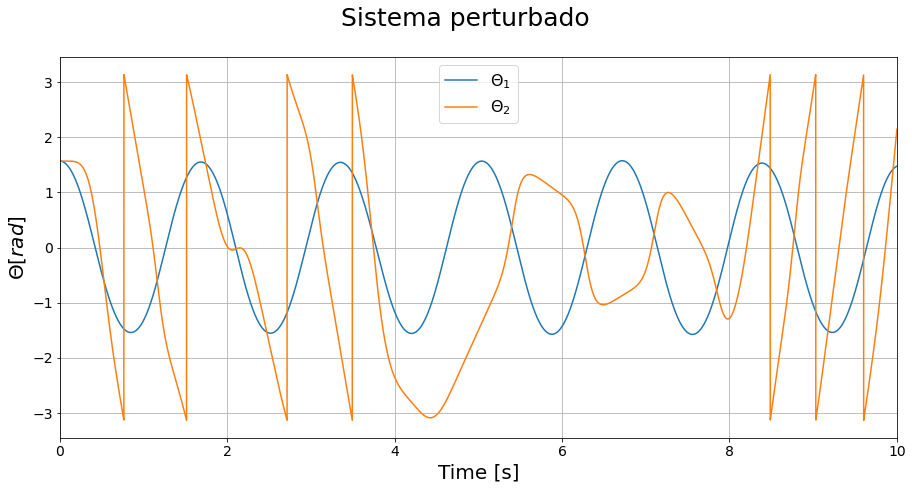

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle('Sistema perturbado', fontsize='25')
ax.plot(T,Theta1, label='$\Theta_1$')
ax.plot(T,Theta2, label='$\Theta_2$')
#ax.set_title('($m_1\gg m_2$) - $\Theta [rad]$ vs $Time [s] $', fontsize=25)
ax.set_xlabel('Time [s]', fontsize=20)
ax.set_ylabel('$\Theta [rad]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.legend(fontsize=16)
ax.set_xlim(0,10)
ax.grid()

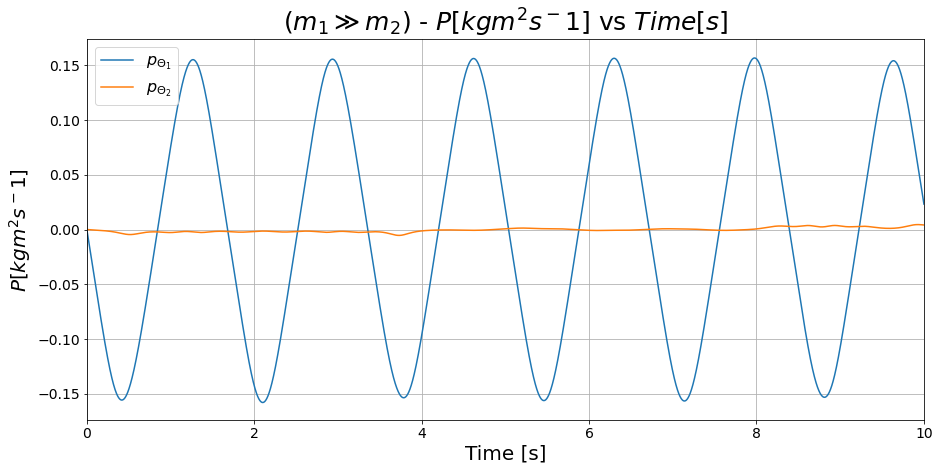

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(T,P1, label='$p_{\Theta_1}$')
ax.plot(T,P2, label='$p_{\Theta_2}$')
ax.set_title('($m_1\gg m_2$) - $P [kg m^2 s^-1]$ vs $Time [s] $', fontsize=25)
ax.set_xlabel('Time [s]', fontsize=20)
ax.set_ylabel('$P [kg m^2 s^-1]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.legend(fontsize=16)
ax.set_xlim(0,10) # Set this
ax.grid()

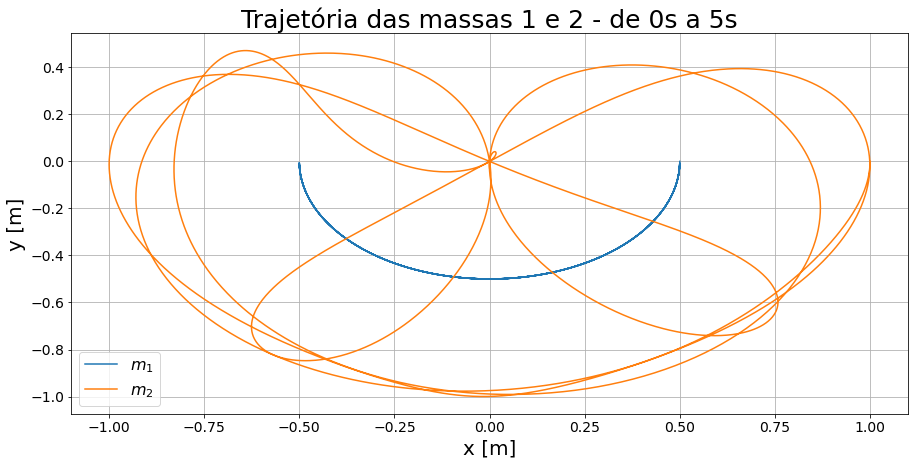

In [ ]:
x1 = l1*np.sin(Theta1) 
x2 = l2*np.sin(Theta2) + x1
y1 = -l1*np.cos(Theta1)
y2 = -l2*np.cos(Theta2) + y1
aux = round(5/dt)
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x1[:aux],y1[:aux], label='$m_1$')
ax.plot(x2[:aux],y2[:aux], label='$m_2$')
ax.set_title('Trajetória das massas 1 e 2 - de 0s a 5s', fontsize=25)
ax.set_xlabel('x [m]', fontsize=20)
ax.set_ylabel('y [m]', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.legend(fontsize=16)
#ax.set_xlim(0,10) # Set this
ax.grid()

In [ ]:
def poincare(p1, p2, theta1, theta2):
  p_poincare = []
  t_poincare = []
  for i in range(np.size(theta2)):
    if theta2[i]>0 and theta2[i-1]<0:
      p_poincare.append(p1[i])
      t_poincare.append(theta1[i])
  return np.array(p_poincare), np.array(t_poincare)

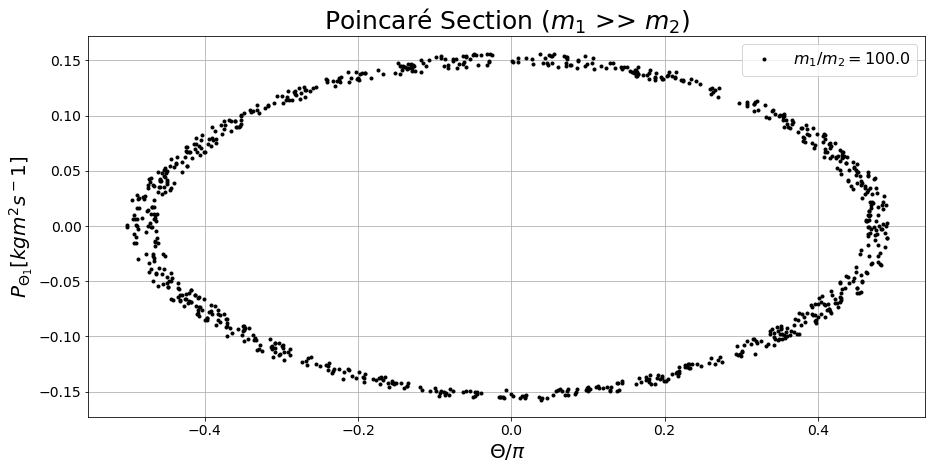

In [ ]:
y,x = poincare(P1, P2, Theta1, Theta2)
Theta1Sec = x[:]
Ptheta1Sec = y[:]
x = x/np.pi
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x,y, 'k.', label = '$m_1/m_2 = {:.1f}$'.format(m1/m2))
ax.set_title('Poincaré Section ($m_1$ >> $m_2$)', fontsize=25)
ax.set_xlabel('$\Theta/\pi$', fontsize=20)
ax.set_ylabel('$P_{\Theta_1} [kg m^2 s^-1]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.legend(fontsize=16)
ax.grid()

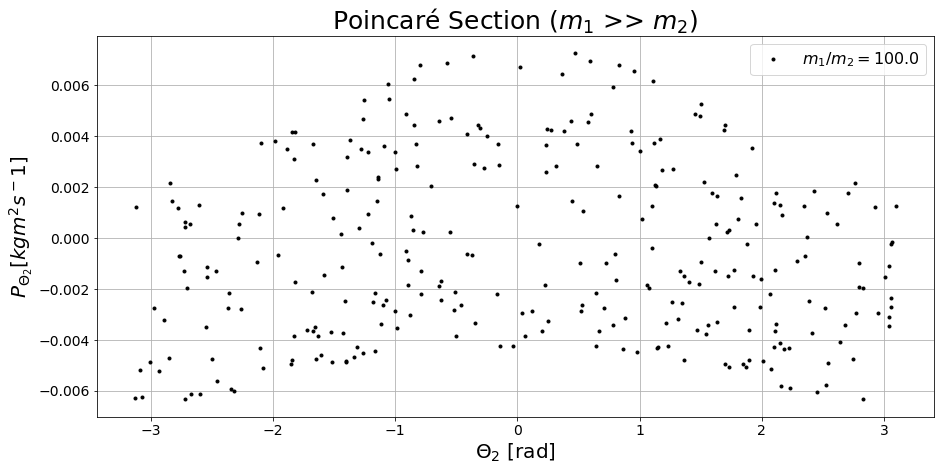

In [ ]:
y,x = poincare(P2, P1, Theta2, Theta1)

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x,y, 'k.', label = '$m_1/m_2 = {:.1f}$'.format(m1/m2))
ax.set_title('Poincaré Section ($m_1$ >> $m_2$)', fontsize=25)
ax.set_xlabel('$\Theta_2$ [rad]', fontsize=20)
ax.set_ylabel('$P_{\Theta_2} [kg m^2 s^-1]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.legend(fontsize=16)
ax.grid()

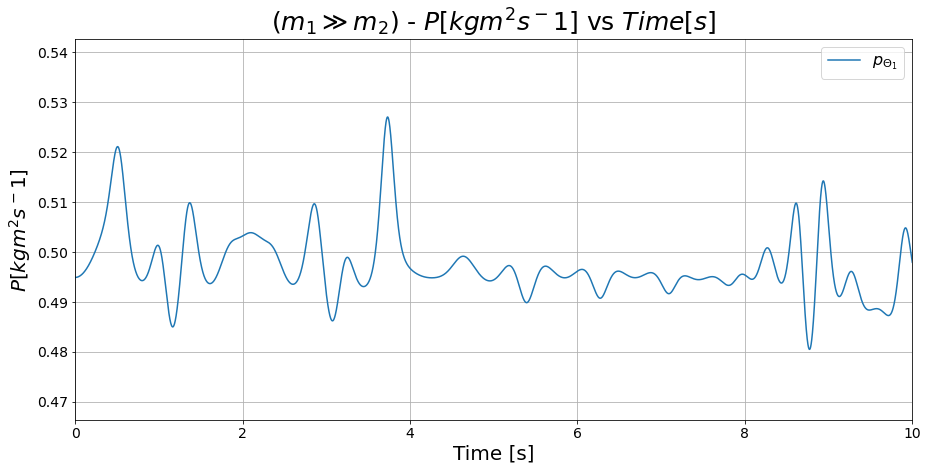

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(T,E, label='$p_{\Theta_1}$')
ax.set_title('($m_1\gg m_2$) - $P [kg m^2 s^-1]$ vs $Time [s] $', fontsize=25)
ax.set_xlabel('Time [s]', fontsize=20)
ax.set_ylabel('$P [kg m^2 s^-1]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.legend(fontsize=16)
ax.set_xlim(0,10) # Set this
ax.grid()

In [ ]:
'''import matplotlib.animation as animation

max = round(20/dt)

x1 = l1*np.sin(Theta1[:max]) 
x2 = l2*np.sin(Theta2[:max]) + x1
y1 = -l1*np.cos(Theta1[:max]) + (l1+l2)*0.5
y2 = -l2*np.cos(Theta2[:max]) + y1

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, autoscale_on=False, xlim=(l1+l2, -l1-l2), ylim=(-l1-l2, l1+l2))

ax.set_title('Approximation $m_1 >> m_2$', fontsize=25)

ax.set_xlabel('X [m]', fontsize=20)
ax.set_ylabel('Y [m]', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.grid()

line, = ax.plot([],[], 'o-', lw=2)
time_template = 'time = %.2fs'
time_text = ax.text(0.05, 0.9, '', fontsize=14, transform=ax.transAxes)
ax.text(0.05, 0.95, f'm1 = {m1:.0e}kg, m2 = {m2:.0e}kg', fontsize=14, transform=ax.transAxes)

def init():
  line.set_data([],[])
  time_text.set_text('')
  return line, time_text

def animate(i):
  global x1
  global x2
  global y1
  global y2
  thisx = [0, x1[i], x2[i]]
  thisy = [(l1+l2)*0.5, y1[i], y2[i]]
  line.set_data(thisx,thisy)
  time_text.set_text(time_template % (i*dt))
  return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1,len(y1)), interval=20, blit=True, init_func=init)

ani.save('double_pendulum_approx.mp4', fps=1/dt)'''

"import matplotlib.animation as animation\n\nmax = round(20/dt)\n\nx1 = l1*np.sin(Theta1[:max]) \nx2 = l2*np.sin(Theta2[:max]) + x1\ny1 = -l1*np.cos(Theta1[:max]) + (l1+l2)*0.5\ny2 = -l2*np.cos(Theta2[:max]) + y1\n\nfig = plt.figure(figsize=(10,10))\n\nax = fig.add_subplot(111, autoscale_on=False, xlim=(l1+l2, -l1-l2), ylim=(-l1-l2, l1+l2))\n\nax.set_title('Approximation $m_1 >> m_2$', fontsize=25)\n\nax.set_xlabel('X [m]', fontsize=20)\nax.set_ylabel('Y [m]', fontsize=20)\nax.tick_params(axis='both', which='major', labelsize=14)\nax.tick_params(axis='both', which='minor', labelsize=14)\nax.grid()\n\nline, = ax.plot([],[], 'o-', lw=2)\ntime_template = 'time = %.2fs'\ntime_text = ax.text(0.05, 0.9, '', fontsize=14, transform=ax.transAxes)\nax.text(0.05, 0.95, f'm1 = {m1:.0e}kg, m2 = {m2:.0e}kg', fontsize=14, transform=ax.transAxes)\n\ndef init():\n  line.set_data([],[])\n  time_text.set_text('')\n  return line, time_text\n\ndef animate(i):\n  global x1\n  global x2\n  global y1\n  globa

# Second Case: No approximation

In [ ]:
# defining the necessary variables of the problem

m1 = 0.1 #kg
m2 = m1#kg
l1 = 0.5 #m
l2 = 0.5 #m
g = 9.8 #m/s²

Tf = 500 #s # duration
dt = 0.01 #s step

In [ ]:
# defining the auxiliary functions

def A(p1, p2, theta1, theta2):
  global m1
  global m2
  global l1
  global l2

  A = p1*p2*np.sin(theta1-theta2)
  A /= l1*l2*(m1 + m2*np.sin(theta1-theta2)**2)
  return A

def B(p1, p2, theta1, theta2):
  global m1
  global m2
  global l1
  global l2

  B = m2*(l2**2)*(p1**2) + (l1**2)*(m1+m2)*(p2**2) - l1*l2*m2*p1*p2*np.cos(theta1-theta2)
  B /= 2*(l1**2)*(l2**2)*(m1+m2*np.sin(theta1-theta2)**2)**2
  B *= np.sin(2*(theta1-theta2))

  return B

def theta1_dot(p1, p2, theta1, theta2):
  global m1
  global m2
  global l1
  global l2
  td = l2*p1-l1*p2*np.cos(theta1-theta2)
  td /= (l1**2)*l2*(m1+m2*np.sin(theta1-theta2)**2)
  return td

def theta2_dot(p1,p2,theta1,theta2):
  global m1
  global m2
  global l1
  global l2
  td = -l2*p1*np.cos(theta1-theta2) + l1*(1+m1/m2)*p2
  td /= l1*(l2**2)*(m1+m2*np.sin(theta1-theta2)**2)
  return td

def p1_dot(p1,p2,theta1,theta2):
  global m1
  global m2
  global l1
  global l2
  global g

  pd = -(m1+m2)*g*l1*np.sin(theta1)
  pd += -A(p1,p2,theta1,theta2) + B(p1,p2,theta1,theta2)

  return pd

def p2_dot(p1,p2,theta1,theta2):
  global m1
  global m2
  global l1
  global l2
  global g

  pd = -m2*g*l2*np.sin(theta2)
  pd += A(p1,p2,theta1,theta2) - B(p1,p2,theta1,theta2)

  return pd

In [ ]:
# defining the energy calculation function

def Energy(p1, p2, theta1, theta2):
  global m1
  global m2
  global l1
  global l2
  global g

  x1_dot = l1*np.cos(theta1)*theta1_dot(p1, p2, theta1, theta2)
  y1_dot = l1*np.sin(theta1)*theta1_dot(p1, p2, theta1, theta2)
  x2_dot = x1_dot + l2*np.cos(theta2)*theta2_dot(p1, p2, theta1, theta2)
  y2_dot = y1_dot + l2*np.sin(theta2)*theta2_dot(p1, p2, theta1, theta2)

  y1 = -l1*np.cos(theta1)
  y2 = y1-l2*np.cos(theta2) 

  K = (1/2) * m1* (x1_dot**2 + y1_dot**2) + (1/2) * m2* (x2_dot**2 + y2_dot**2)
  U = g*(m1*y1 + m2*y2)
  E = K + U

  return E

In [ ]:
# defining the iteration function

def iterate(p1, p2, theta1, theta2):
  global m1
  global m2
  global l1
  global l2
  global dt
  global g

  k1_theta1 = theta1_dot(p1, p2, theta1, theta2)*dt
  k1_theta2 = theta2_dot(p1, p2, theta1, theta2)*dt
  k1_p1 = p1_dot(p1, p2, theta1, theta2)*dt
  k1_p2 = p2_dot(p1, p2, theta1, theta2)*dt

  theta1_half = theta1 + k1_theta1/2
  theta2_half = theta2 + k1_theta2/2
  p1_half = p1 + k1_p1/2
  p2_half = p2 + k1_p2/2

  k2_theta1 = theta1_dot(p1_half, p2_half, theta1_half, theta2_half)*dt
  k2_theta2 = theta2_dot(p1_half, p2_half, theta1_half, theta2_half)*dt
  k2_p1 = p1_dot(p1_half, p2_half, theta1_half, theta2_half)*dt
  k2_p2 = p2_dot(p1_half, p2_half, theta1_half, theta2_half)*dt

  theta1_new = theta1 + k2_theta1
  if theta1_new >= np.pi:
    theta1_new -= 2*np.pi
  elif theta1_new <= -np.pi:
    theta1_new += 2*np.pi
  theta2_new = theta2 + k2_theta2
  if theta2_new >= np.pi:
    theta2_new -= 2*np.pi
  elif theta2_new <= -np.pi:
    theta2_new += 2*np.pi
  p1_new = p1 + k2_p1
  p2_new = p2 + k2_p2
  # print(p1_new, p2_new, theta1_new, theta2_new)
  return p1_new, p2_new, theta1_new, theta2_new


In [ ]:
# defining lists
T = np.arange(0,Tf, dt)
Theta1 = np.zeros(np.size(T))
Theta2 = np.zeros(np.size(T))
P1 = np.zeros(np.size(T))
P2 = np.zeros(np.size(T))
E = np.zeros(np.size(T))

In [ ]:
# defining initial conditions
theta1_0 = 0
theta2_0 = np.pi
p1_0 = 0.05*(1.01)
p2_0 = 0

#p1_0 = np.sqrt(2*m1*l1**2*(E_0-m2*g*l2)) # picked the positive root, but you can change it if necessary

Theta1[0] = theta1_0
Theta2[0] = theta2_0
P1[0] = p1_0
P2[0] = p2_0
E[0] = E_0
E[0] = Energy(p1_0, p2_0, theta1_0, theta2_0)

In [ ]:
# Running the simulation
for i in range(np.size(T)-1):
  aux = iterate(P1[i], P2[i], Theta1[i], Theta2[i])
  Theta1[i+1] = aux[2]
  Theta2[i+1] = aux[3]
  P1[i+1] = aux[0]
  P2[i+1] = aux[1]
  E[i+1] = Energy(P1[1+i], P2[i+1], Theta1[i+1], Theta2[i+1])

In [ ]:
for i in range(5):
  print(f'N = {i+1:.4f}: tempo={T[i]:.4f} theta1={Theta1[i]:.4f} Ptheta1={P1[i]:.4f} theta2={Theta2[i]:.4f} Ptheta2={P2[i]:.4f}')

N = 1.0000: tempo=0.0000 theta1=0.0000 Ptheta1=0.0505 theta2=3.1416 Ptheta2=0.0000
N = 2.0000: tempo=0.0100 theta1=0.0202 Ptheta1=0.0504 theta2=-3.1214 Ptheta2=0.0000
N = 3.0000: tempo=0.0200 theta1=0.0404 Ptheta1=0.0501 theta2=-3.1012 Ptheta2=0.0002
N = 4.0000: tempo=0.0300 theta1=0.0604 Ptheta1=0.0496 theta2=-3.0810 Ptheta2=0.0004
N = 5.0000: tempo=0.0400 theta1=0.0804 Ptheta1=0.0489 theta2=-3.0608 Ptheta2=0.0008


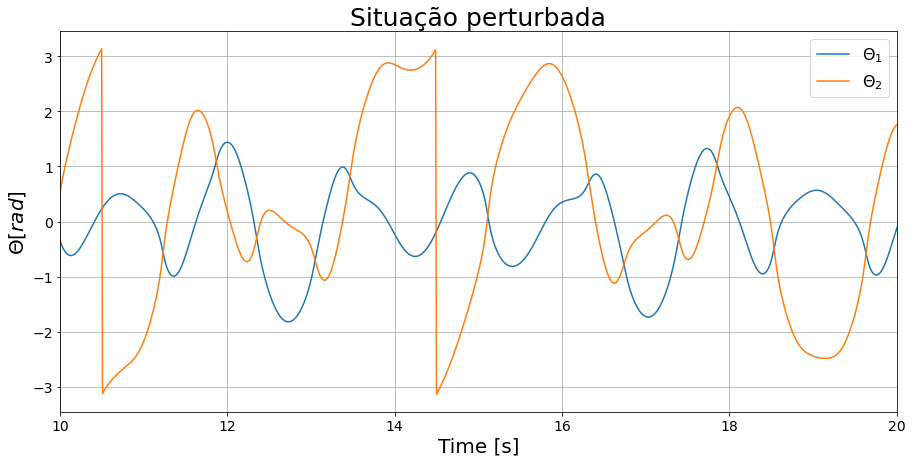

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(T,Theta1, label='$\Theta_1$')
ax.plot(T,Theta2, label='$\Theta_2$')
ax.set_title('Situação perturbada', fontsize=25)
ax.set_xlabel('Time [s]', fontsize=20)
ax.set_ylabel('$\Theta [rad]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.legend(fontsize=16)
ax.set_xlim(10,20)
ax.grid()

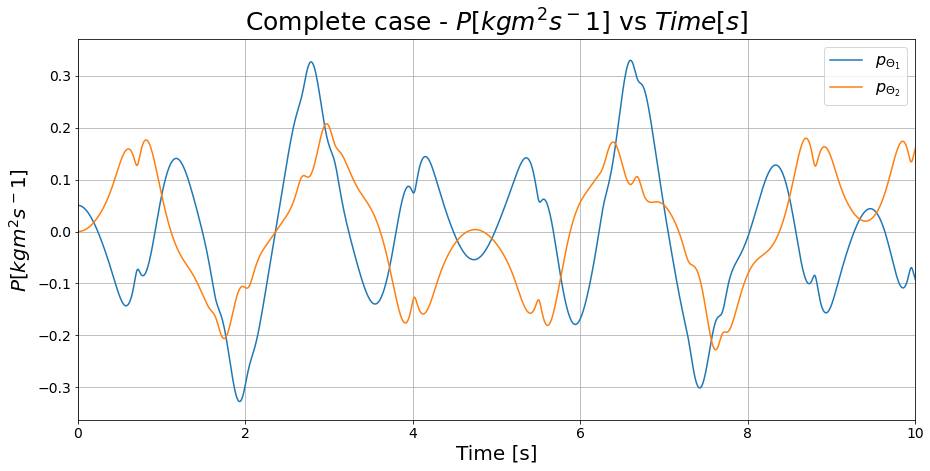

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(T,P1, label='$p_{\Theta_1}$')
ax.plot(T,P2, label='$p_{\Theta_2}$')
ax.set_title('Complete case - $P [kg m^2 s^-1]$ vs $Time [s] $', fontsize=25)
ax.set_xlabel('Time [s]', fontsize=20)
ax.set_ylabel('$P [kg m^2 s^-1]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.legend(fontsize=16)
ax.set_xlim(0,10) # Set this
ax.grid()

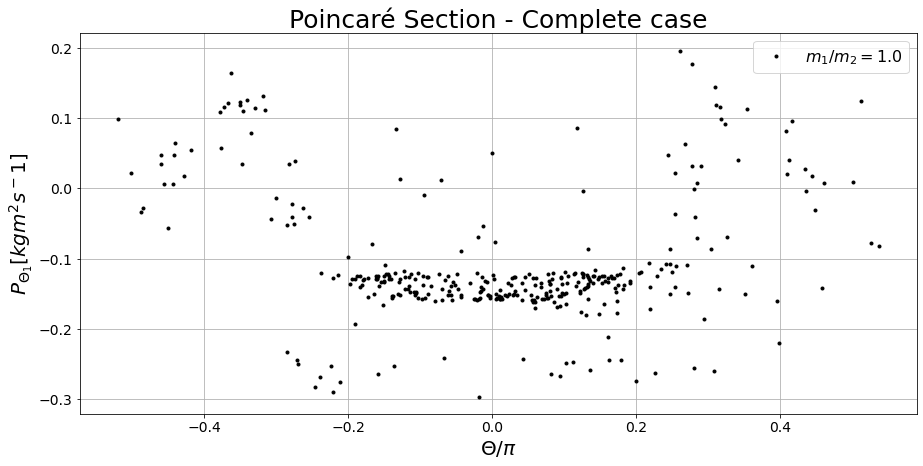

In [ ]:
y,x = poincare(P1, P2, Theta1, Theta2)
x = x/np.pi
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x,y, 'k.', label = '$m_1/m_2 = {:.1f}$'.format(m1/m2))
ax.set_title('Poincaré Section - Complete case', fontsize=25)
ax.set_xlabel('$\Theta/\pi$', fontsize=20)
ax.set_ylabel('$P_{\Theta_1} [kg m^2 s^-1]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.legend(fontsize=16)
ax.grid()

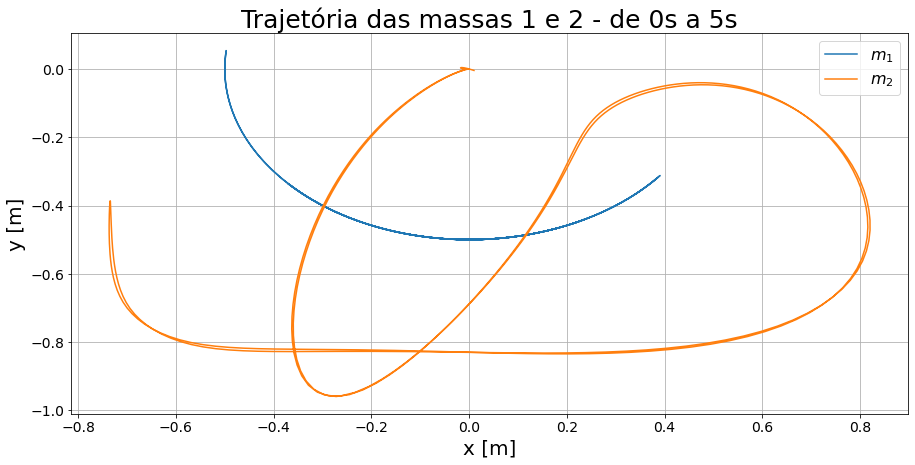

In [ ]:
x1 = l1*np.sin(Theta1) 
x2 = l2*np.sin(Theta2) + x1
y1 = -l1*np.cos(Theta1)
y2 = -l2*np.cos(Theta2) + y1
aux = round(5/dt)
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x1[:aux],y1[:aux], label='$m_1$')
ax.plot(x2[:aux],y2[:aux], label='$m_2$')
ax.set_title('Trajetória das massas 1 e 2 - de 0s a 5s', fontsize=25)
ax.set_xlabel('x [m]', fontsize=20)
ax.set_ylabel('y [m]', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.legend(fontsize=16)
#ax.set_xlim(0,10) # Set this
ax.grid()

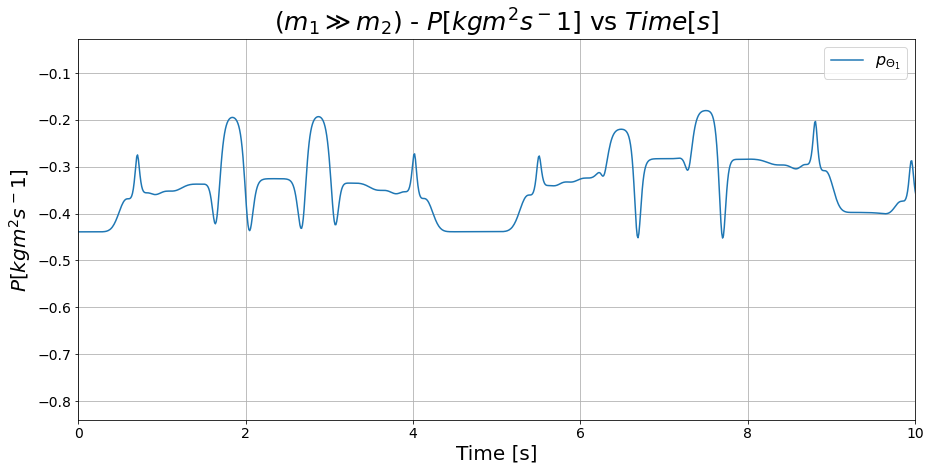

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(T,E, label='$p_{\Theta_1}$')
ax.set_title('($m_1\gg m_2$) - $P [kg m^2 s^-1]$ vs $Time [s] $', fontsize=25)
ax.set_xlabel('Time [s]', fontsize=20)
ax.set_ylabel('$P [kg m^2 s^-1]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.legend(fontsize=16)
ax.set_xlim(0,10) # Set this
ax.grid()

In [ ]:
'''import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

max = round(10/dt)

x1 = l1*np.sin(Theta1[:max])
x2 = l2*np.sin(Theta2[:max]) + x1
y1 = -l1*np.cos(Theta1[:max]) + (l1+l2)*0.5
y2 = -l2*np.cos(Theta2[:max]) + y1

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, autoscale_on=False, xlim=(l1+l2, -l1-l2), ylim=(-l1-l2, l1+l2))

ax.set_title('Complete Case', fontsize=25)

ax.set_xlabel('X [m]', fontsize=20)
ax.set_ylabel('Y [m]', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.grid()

line, = ax.plot([],[], 'o-', lw=2)
time_template = 'time = %.2fs'
time_text = ax.text(0.05, 0.9, '', fontsize=14, transform=ax.transAxes)
ax.text(0.05, 0.95, f'm1 = {m1:.0e}kg, m2 = {m2:.0e}kg', fontsize=14, transform=ax.transAxes)

def init():
  line.set_data([],[])
  time_text.set_text('')
  return line, time_text

def animate(i):
  global x1
  global x2
  global y1
  global y2
  thisx = [0, x1[i], x2[i]]
  thisy = [(l1+l2)*0.5, y1[i], y2[i]]
  line.set_data(thisx,thisy)
  time_text.set_text(time_template % (i*dt))
  return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1,len(y1)), interval=20, blit=True, init_func=init)

#writergif = PillowWriter(fps=50) 
#ani.save('animation_complete', writer=writergif)

ani.save('double_pendulum_complete.mp4', fps=round(1/dt))'''

"import matplotlib.animation as animation\nfrom matplotlib.animation import PillowWriter\n\nmax = round(10/dt)\n\nx1 = l1*np.sin(Theta1[:max])\nx2 = l2*np.sin(Theta2[:max]) + x1\ny1 = -l1*np.cos(Theta1[:max]) + (l1+l2)*0.5\ny2 = -l2*np.cos(Theta2[:max]) + y1\n\nfig = plt.figure(figsize=(10,10))\n\nax = fig.add_subplot(111, autoscale_on=False, xlim=(l1+l2, -l1-l2), ylim=(-l1-l2, l1+l2))\n\nax.set_title('Complete Case', fontsize=25)\n\nax.set_xlabel('X [m]', fontsize=20)\nax.set_ylabel('Y [m]', fontsize=20)\nax.tick_params(axis='both', which='major', labelsize=14)\nax.tick_params(axis='both', which='minor', labelsize=14)\nax.grid()\n\nline, = ax.plot([],[], 'o-', lw=2)\ntime_template = 'time = %.2fs'\ntime_text = ax.text(0.05, 0.9, '', fontsize=14, transform=ax.transAxes)\nax.text(0.05, 0.95, f'm1 = {m1:.0e}kg, m2 = {m2:.0e}kg', fontsize=14, transform=ax.transAxes)\n\ndef init():\n  line.set_data([],[])\n  time_text.set_text('')\n  return line, time_text\n\ndef animate(i):\n  global x1\n